# CLUSTERING
- Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

### Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset and its Analysis

In [7]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#checking for null values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.shape

(150, 6)

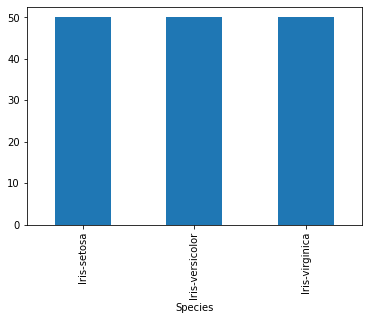

In [21]:
data.groupby('Species').size().plot.bar()
plt.show()

In [25]:
df = data.copy()
df = df.drop('Species',axis=1)
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.shape

(150, 4)

In [29]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
n = MinMaxScaler()
n.fit(df)
norm = n.transform(df)
norm.shape

(150, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Types of Clustering Analysis
We are going to compare three types of clustering and their performance metrcs.
- Affinity Propogation Clustering
- Mean Shift Clustering
- Mixture of Gaussians Clustering

In [31]:
# importing libraries
from sklearn.cluster import AffinityPropagation, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import metrics

In [41]:
# 1. AFFINITY PROPORTION

#estimating the number of clusters
af = AffinityPropagation(preference=-3).fit(norm)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

#assigning cluster number to each data
Clustered = norm.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = af.labels_ # append labels to points
frames = [data['Species'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)

#assigning a label to each cluster
for ClusterNum in range(3):
    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Species').size())
    OneCluster.columns=['Size']
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]
    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    print(ClusterNum, NewDigit[0])
    
result.sample(5) #clustered data

Estimated number of clusters: 3
0 Iris-setosa
1 Iris-versicolor
2 Iris-virginica


C:\Users\91999\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


,Species,Cluster,TransLabel
97,Iris-versicolor,1,Iris-versicolor
132,Iris-virginica,2,Iris-virginica
117,Iris-virginica,2,Iris-virginica
27,Iris-setosa,0,Iris-setosa
130,Iris-virginica,2,Iris-virginica


In [48]:
#metric performance analysis 
print("-"*40)
print('AFFINITY PROPORTION CLUSTERING ANALYSIS:')
print("-"*40)

Correct = (data['Species'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)
print('Silhouette: ', round(metrics.silhouette_score(norm, result['TransLabel'],metric='sqeuclidean'),3))
print('Homogeneity Score: ', round(metrics.homogeneity_score(data['Species'], result['TransLabel']),3))
print('Completeness Score: ', round(metrics.completeness_score(data['Species'], result['TransLabel']),3))
print('V-Measure Score: ', round(metrics.v_measure_score(data['Species'], result['TransLabel']),3))
print('Adjusted Rand Score: ', round(metrics.adjusted_rand_score(data['Species'], result['TransLabel']),3))
print('Adjusted Mutual Info Score: ', round(metrics.adjusted_mutual_info_score(data['Species'], result['TransLabel']),3))

----------------------------------------
AFFINITY PROPORTION CLUSTERING ANALYSIS:
----------------------------------------
Accuracy  0.9
Silhouette:  0.696
Homogeneity Score:  0.77
Completeness Score:  0.786
V-Measure Score:  0.778
Adjusted Rand Score:  0.745
Adjusted Mutual Info Score:  0.775


**Affinity Proportion Clustering gives an accuracy of 90%.**

In [55]:
# 2. MEAN SHIFT CLUSTERING
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(norm, quantile=0.2)

#estimating the number of clusters
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Estimated number of clusters : %d" % n_clusters_)

#assigning cluster number to each data
Clustered = norm.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = ms.labels_ # append labels to points
frames = [data['Species'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)

#assigning a label to each data
for ClusterNum in range(3):
    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Species').size())
    OneCluster.columns=['Size']
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]
    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    print(ClusterNum, NewDigit[0])
    
result.sample(5) #clustered data

Estimated number of clusters : 3
0 Iris-versicolor
1 Iris-setosa
2 Iris-virginica


,Species,Cluster,TransLabel
136,Iris-virginica,2,Iris-virginica
105,Iris-virginica,2,Iris-virginica
52,Iris-versicolor,0,Iris-versicolor
34,Iris-setosa,1,Iris-setosa
15,Iris-setosa,1,Iris-setosa


In [58]:
#metric performance analysis 
print("-"*35)
print('MEAN SHIFT CLUSTERING ANALYSIS:')
print("-"*35)

Correct = (data['Species'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)
print('Silhouette: ', round(metrics.silhouette_score(norm, result['TransLabel'],metric='sqeuclidean'),3))
print('Homogeneity Score: ', round(metrics.homogeneity_score(data['Species'], result['TransLabel']),3))
print('Completeness Score: ', round(metrics.completeness_score(data['Species'], result['TransLabel']),3))
print('V-Measure Score: ', round(metrics.v_measure_score(data['Species'], result['TransLabel']),3))
print('Adjusted Rand Score: ', round(metrics.adjusted_rand_score(data['Species'], result['TransLabel']),3))
print('Adjusted Mutual Info Score: ', round(metrics.adjusted_mutual_info_score(data['Species'], result['TransLabel']),3))

-----------------------------------
MEAN SHIFT CLUSTERING ANALYSIS:
-----------------------------------
Accuracy  0.793
Silhouette:  0.635
Homogeneity Score:  0.673
Completeness Score:  0.77
V-Measure Score:  0.718
Adjusted Rand Score:  0.593
Adjusted Mutual Info Score:  0.714


**Mean Shift Clustering gives an accuracy of 79.3%.**

In [70]:
# 3. Mixture of Gaussians Clustering

#estimating the number of clusters
sc = GaussianMixture(n_components=3, covariance_type='full')
y_pred = sc.fit_predict(norm)
print("number of estimated clusters : %d" % len(set(y_pred)))

#assigning cluster number to each data
Clustered = norm.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = y_pred 
frames = [data['Species'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)

#assigning a label to each cluster
for ClusterNum in range(3):
    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Species').size())
    OneCluster.columns=['Size']
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]
    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    print(ClusterNum, NewDigit[0])
    
result.sample(5) #clustered data

number of estimated clusters : 3
0 Iris-setosa
1 Iris-virginica
2 Iris-versicolor


,Species,Cluster,TransLabel
104,Iris-virginica,1,Iris-virginica
127,Iris-virginica,1,Iris-virginica
138,Iris-virginica,1,Iris-virginica
143,Iris-virginica,1,Iris-virginica
83,Iris-versicolor,1,Iris-virginica


In [71]:
#metric performance analysis 
print("-"*45)
print('MIXTURE OF GAUSSIANS CLUSTERING ANALYSIS:')
print("-"*45)

Correct = (data['Species'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)
print('Silhouette: ', round(metrics.silhouette_score(norm, result['TransLabel'],metric='sqeuclidean'),3))
print('Homogeneity Score: ', round(metrics.homogeneity_score(data['Species'], result['TransLabel']),3))
print('Completeness Score: ', round(metrics.completeness_score(data['Species'], result['TransLabel']),3))
print('V-Measure Score: ', round(metrics.v_measure_score(data['Species'], result['TransLabel']),3))
print('Adjusted Rand Score: ', round(metrics.adjusted_rand_score(data['Species'], result['TransLabel']),3))
print('Adjusted Mutual Info Score: ', round(metrics.adjusted_mutual_info_score(data['Species'], result['TransLabel']),3))

---------------------------------------------
MIXTURE OF GAUSSIANS CLUSTERING ANALYSIS:
---------------------------------------------
Accuracy  0.967
Silhouette:  0.606
Homogeneity Score:  0.898
Completeness Score:  0.901
V-Measure Score:  0.9
Adjusted Rand Score:  0.904
Adjusted Mutual Info Score:  0.898


**Mixture of Gaussians Clustering gives an accuray of 96.7%.**

### Thus, from the above analysis, we can conclude that out of three Clustering algorithms compared, **Mixture of Gaussian Clustering Algorithm gives the best accuracy, i.e, 96.7%.**